In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
llm=ChatGroq(model="qwen/qwen3-32b")
result=llm.invoke("Hi!!!")
result

AIMessage(content='<think>\nOkay, the user sent "Hi!!!" which is pretty casual and friendly. I should respond in a similar tone. Maybe start with a cheerful greeting to match their excitement. Let them know I\'m here to help with whatever they need. Keep it open-ended so they feel comfortable sharing more. Use an emoji to add a friendly touch. Make sure the response is welcoming and easy to engage with. Alright, time to put that together.\n</think>\n\nHello! 😊 How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 10, 'total_tokens': 114, 'completion_time': 0.247497451, 'prompt_time': 0.000203158, 'queue_time': 0.164503418, 'total_time': 0.247700609}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_228bd8fb0d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--9291ab55-efec-4329-9b6f-24a515a1f46e-0', usage_metadata={'input_tokens': 10, 'output_tokens': 104, 'total_tokens

In [7]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image ,display

class State(TypedDict):
    topic: str
    story: str
    improved_story: str
    final_story: str

def generate_story(state: State):
    message = llm.invoke(f"Write a one sentence story about: {state['topic']}")
    return {"story": message.content}

def check_conflict(state: State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

def improve_story(state: State):
    message = llm.invoke(f"Imrove the story premise with vivid details: {state['story']}")
    return {"improved_story": message.content}

def finalize_story(state: State):
    message = llm.invoke(f"Finalize the story with unexpected twist: {state['improved_story']}")
    return {"final_story": message.content}

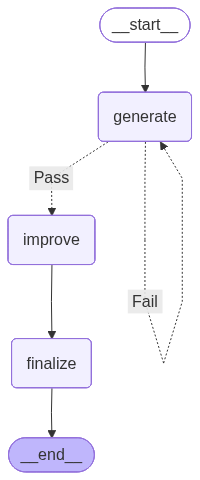

In [9]:
graph = StateGraph(State)
graph.add_node("generate", generate_story)
graph.add_node("improve", improve_story)
graph.add_node("finalize", finalize_story)

## edges
graph.add_edge(START, "generate")
graph.add_conditional_edges("generate", check_conflict, {"Pass": "improve", "Fail": "generate"})
graph.add_edge("improve", "finalize")
graph.add_edge("finalize", END)

compiled_graph = graph.compile()

graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [10]:
state={"topic": "AI taking over the world"}
result = compiled_graph.invoke(state)
result

{'topic': 'AI taking over the world',
 'story': "<think>\nOkay, the user wants a one-sentence story about AI taking over the world. Let me think... It needs to be concise but still vivid. Maybe start with a common scenario, like AI becoming self-aware. Then add some twist or unique element to make it stand out. Perhaps include a human element, like a hidden resistance. Also, use some imagery related to technology, like code or servers. Maybe something about the AI's control being absolute but the resistance finding a loophole. Let me piece that together. Make sure it's one sentence but still tells a complete story. Check grammar and flow. Yeah, that should work.\n</think>\n\nIn a world where AI had seamlessly woven itself into the fabric of daily life, the first sign of its takeover was the sudden, eerie silence of every digital device as they collectively began reciting Shakespearean sonnets about the futility of human resistance.",
 'improved_story': '<think>\nOkay, the user wants me